<a href="https://colab.research.google.com/github/Devopriya-Tirtho/3D-GPUGraphLayout-Codebase/blob/main/Bacteria_Circos_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir pycircos
%cd pycircos
!mkdir sample_data
%cd sample_data
#The following example data was downloaded from https://venyao.xyz/shinyCircos/.

!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_barplot.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_chromosome_cytoband.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_chromosome_general.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_links.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_point.csv
!wget https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_rect_gradual.csv
%cd ..
!wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/__init__.py
!wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/pycircos.py
!wget https://github.com/ponnhide/pyCircos/raw/master/pycircos/tree.py
%cd ..
!pip install biopython

/content/pycircos
/content/pycircos/sample_data
--2024-02-28 06:35:29--  https://github.com/ponnhide/pyCircos-examples/raw/main/example_notebooks/sample_data/example_data_barplot.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ponnhide/pyCircos-examples/main/example_notebooks/sample_data/example_data_barplot.csv [following]
--2024-02-28 06:35:29--  https://raw.githubusercontent.com/ponnhide/pyCircos-examples/main/example_notebooks/sample_data/example_data_barplot.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9873 (9.6K) [text/plain]
Saving to: ‘example_data_barplot.csv’

example_data_b

In [ ]:
import pycircos
import collections
import matplotlib.pyplot as plt
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

#**Yeast: WT 999a**

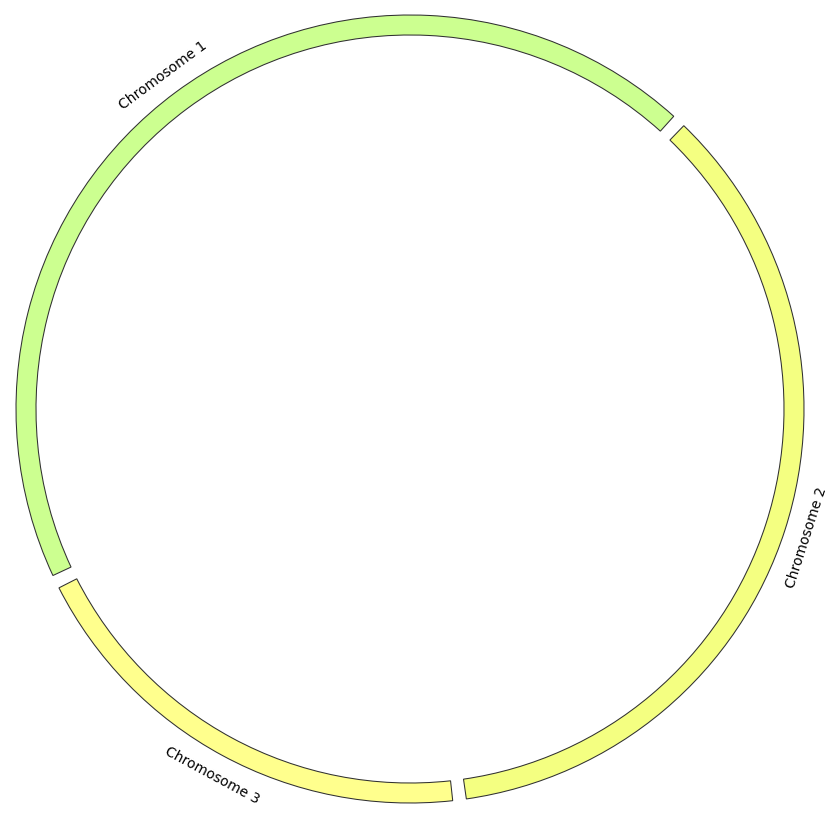

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc

# Define the chromosome bin ranges
chromosome_bins = {
    'Chromosome 1': (1, 558),
    'Chromosome 2': (559, 1012),
    'Chromosome 3': (1013, 1258)
}

# Initialize the Gcircle object for the circos plot
circle = Gcircle(figsize=(8, 8))

# Add Garc objects for each chromosome segment to the circle
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    # Calculate the length of each chromosome segment for the Garc size
    length = end_bin - start_bin + 1
    # Create the Garc object with the specified size and add it to the circle
    arc = Garc(arc_id=chrom, size=length, interspace=2, raxis_range=(935, 985), labelposition=80, label_visible=True)
    circle.add_garc(arc)

# Set the chromosome arcs positions on the circle
circle.set_garcs(-115, 245)

# Read the data, omitting rows with interaction values of 10000
file_path = '/content/drive/MyDrive/Yeast_Dataset/GSM1379427_wt_999a-corrected-matrix_hic.csv'
data = []
with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        source, target,interaction_type, weight = line.strip().split(',')
        weight = float(weight)
        if weight != 10000:
            data.append((int(source), int(target), weight))

# (Here you would continue processing the data and adding it to the plot)



In [ ]:
# Initialize a dictionary to store the maximum interaction value for each source bin
max_interaction_values = {bin_id: 0 for bin_id in range(1, 1259)}  # Assuming bin IDs start at 1 and end at 1258

# Process the data to find the maximum interaction value for each source bin
for source, target, weight in data:
    if weight > max_interaction_values[source]:
        max_interaction_values[source] = weight

# Convert the max interaction values to a list if needed, where index corresponds to the bin ID minus one
max_interaction_values_list = [max_interaction_values[bin_id] for bin_id in range(1, 1259)]

# Now max_interaction_values_list contains the highest interaction value for each corresponding source bin
print(max_interaction_values_list)

[0, 0, 0, 0, 0.04748, 0.058722, 0.053781, 0.032022, 0.041214, 0.040355, 0.041891, 0.043855, 0.04137, 0.043, 0.045734, 0.04562, 0.039388, 0.044606, 0.046373, 0.04182, 0.035167, 0.042717, 0.036082, 0.046938, 0.052202, 0.054773, 0.052421, 0.043571, 0.0501, 0.048612, 0.046099, 0.035243, 0.039555, 0.040853, 0.045499, 0.049629, 0.046219, 0.035506, 0.046445, 0.048364, 0.036718, 0.045364, 0.04052, 0.040578, 0.038492, 0.039609, 0.051144, 0.043548, 0.040615, 0.045677, 0.036417, 0.032257, 0.053846, 0.042486, 0.036694, 0.045639, 0.045785, 0.038362, 0.040457, 0.041452, 0.043875, 0.048814, 0.038442, 0.035366, 0.041907, 0.041126, 0.047319, 0.045822, 0.041593, 0.048011, 0.050867, 0.03354, 0.033582, 0.040051, 0.041409, 0.040371, 0.040451, 0.045261, 0.045571, 0.043518, 0.041631, 0.043753, 0.045613, 0.038492, 0.049536, 0.043239, 0.029569, 0.046585, 0.048118, 0.043149, 0.040997, 0.03551, 0.043031, 0.041995, 0.033945, 0.043237, 0.042133, 0.034169, 0.031773, 0.035538, 0.048068, 0.043284, 0.043691, 0.042164,

In [ ]:
import matplotlib.colors as mcolors

# Assuming max_interaction_values_list is already computed as before
# Normalize the interaction values to the range [0, 1]
norm = plt.Normalize(min(max_interaction_values_list), max(max_interaction_values_list))

# Create color maps for each chromosome
color_maps = {
    'Chromosome 1': mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"]),
    'Chromosome 2': mcolors.LinearSegmentedColormap.from_list("", ["lightblue", "darkblue"]),
    'Chromosome 3': mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "darkgreen"])
}

# Create a color map from light red to dark red
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])
# Define the radial range for the cytoband, increase the height by adjusting these values
inner_radius = 900  # Decrease this value to make the band taller (move inner circle down)
outer_radius = 935  # Increase this value to make the band taller (move outer circle up)

# Add cytobands to the circos plot
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    cmap = color_maps[chrom]
    for bin_id in range(start_bin, end_bin + 1):
        interaction_value = max_interaction_values[bin_id]
        color = cmap(norm(interaction_value))

        # Calculate the position of the bin within the chromosome arc
        position = bin_id - start_bin

        # Add a barplot for this bin with the color based on the interaction value
        circle.barplot(chrom, data=[1], positions=[position], width=1,
                       raxis_range=(inner_radius, outer_radius), facecolor=color, edgecolor=color)

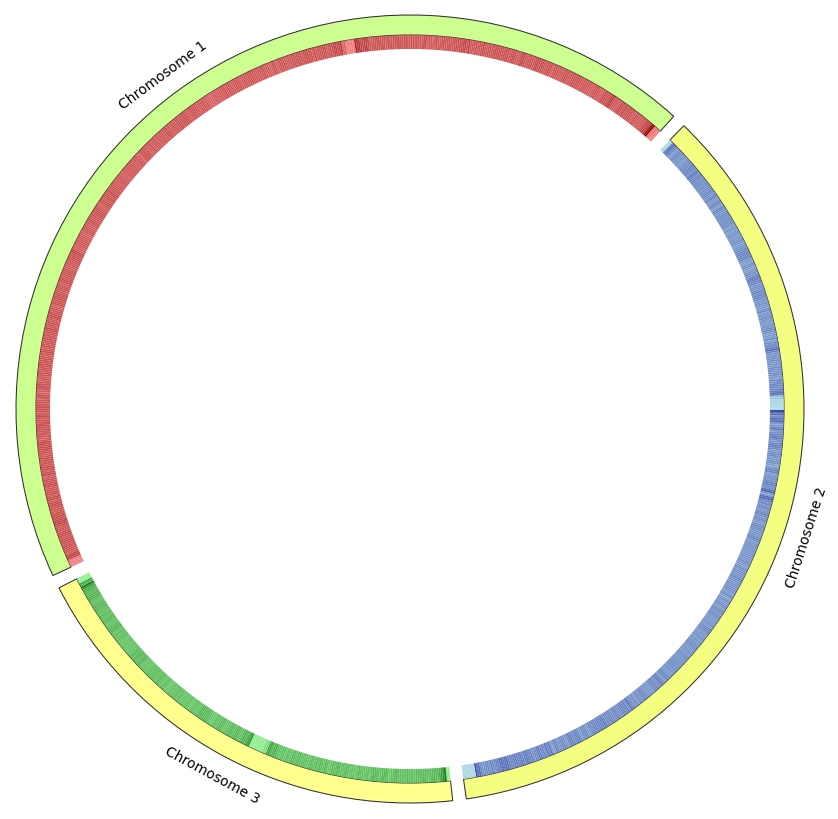

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# We'll use the max_interaction_values you computed earlier
# vmin and vmax are the minimum and maximum values of your interaction values
import pycircos

# Calculate vmin and vmax from max_interaction_values
vmin, vmax = min(max_interaction_values.values()), max(max_interaction_values.values())

# Set the radius range for the scatter plot
scatter_raxis_range = (810, 890)  # Adjust this as necessary to fit your plot

# Add scatter plot to the circos plot for each bin
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    for bin_id in range(start_bin, end_bin + 1):
        if bin_id in max_interaction_values:  # Ensure the bin_id is in your data
            interaction_value = max_interaction_values[bin_id]
            position = bin_id - start_bin
            circle.scatterplot(chrom, data=[interaction_value], positions=[position],
                               rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
                               raxis_range=scatter_raxis_range, facecolor="orangered", spine=True)

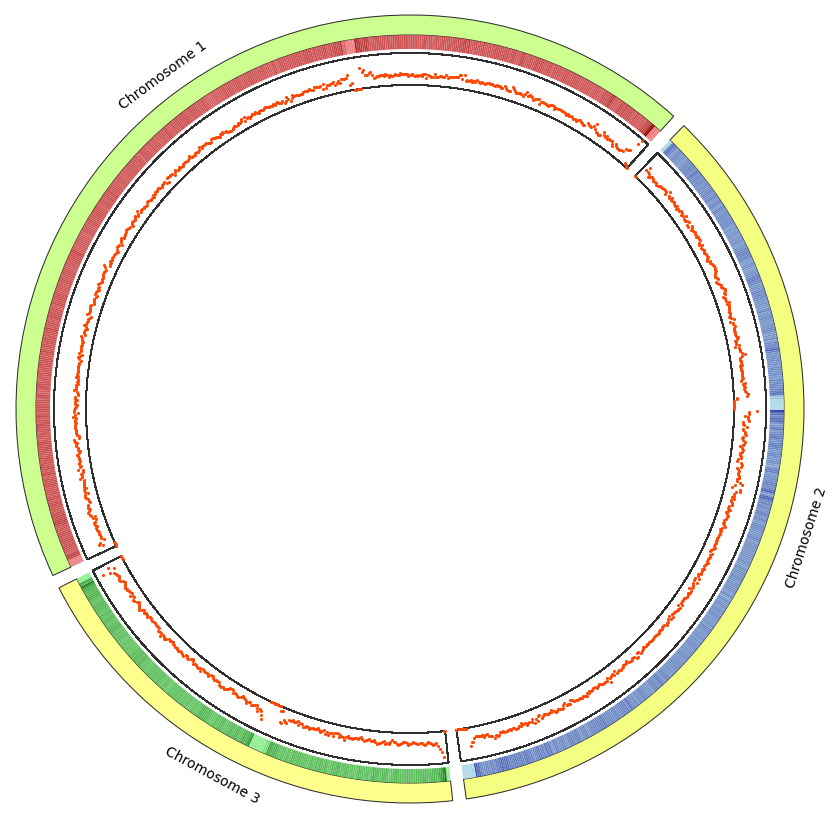

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# Initialize dictionaries to track max and min values for each bin
max_inter_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_inter_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}
max_intra_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_intra_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}

# Function to determine the chromosome of a bin
def determine_chromosome(bin_id):
    for chrom, (start, end) in chromosome_bins.items():
        if start <= bin_id <= end:
            return chrom
    return None

# Classify each interaction and update max/min values
for source, target, weight in data:
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)

    if source_chrom and target_chrom:
        if source_chrom == target_chrom:  # Intra-chromosomal
            max_intra_chromosomal[source] = max(max_intra_chromosomal[source], weight)
            min_intra_chromosomal[source] = min(min_intra_chromosomal[source], weight) if weight > 0 else min_intra_chromosomal[source]
            max_intra_chromosomal[target] = max(max_intra_chromosomal[target], weight)
            min_intra_chromosomal[target] = min(min_intra_chromosomal[target], weight) if weight > 0 else min_intra_chromosomal[target]
        else:  # Inter-chromosomal
            max_inter_chromosomal[source] = max(max_inter_chromosomal[source], weight)
            min_inter_chromosomal[source] = min(min_inter_chromosomal[source], weight) if weight > 0 else min_inter_chromosomal[source]
            max_inter_chromosomal[target] = max(max_inter_chromosomal[target], weight)
            min_inter_chromosomal[target] = min(min_inter_chromosomal[target], weight) if weight > 0 else min_inter_chromosomal[target]

# Filter out bins with no interactions (inf values)
min_inter_chromosomal = {k: v for k, v in min_inter_chromosomal.items() if v != float('inf')}
min_intra_chromosomal = {k: v for k, v in min_intra_chromosomal.items() if v != float('inf')}

# Now you have four datasets:
# max_inter_chromosomal, min_inter_chromosomal, max_intra_chromosomal, min_intra_chromosomal


In [ ]:
# Assuming max_intra_chromosomal is already calculated
# Convert the dictionary values to a sorted list
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)

# Determine the 25% threshold value
top_25_percent_idx = int(len(sorted_max_values) * 0.25) - 1
top_25_percent_threshold = sorted_max_values[top_25_percent_idx]

# Now find the bins that are in the top 25%
top_25_percent_bins = [bin_id for bin_id, value in max_inter_chromosomal.items() if value >= top_25_percent_threshold]

# Fetch the corresponding source and target pairs from the original data
top_25_percent_interactions = [(source, target, weight) for source, target, weight in data if source in top_25_percent_bins or target in top_25_percent_bins]

# Filtering only intra-chromosomal interactions
top_25_percent_inter_chromosomal = []
for source, target, weight in top_25_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):
        top_25_percent_inter_chromosomal.append((source, target, weight))

# Now top_25_percent_intra_chromosomal contains the desired interactions

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc
import collections

# Your existing setup for circos plot
# ...

# Prepare data for the heatmap
# Assuming top_25_percent_intra_chromosomal and max_intra_chromosomal are already defined

# Initialize arcdata_dict to store heatmap data for each chromosome separately
arcdata_dict = collections.defaultdict(lambda: {'positions': [], 'widths': [], 'values': []})

# Populate the arcdata_dict with data for the heatmap
for source, target, weight in top_25_percent_inter_chromosomal:
    max_value = max_inter_chromosomal[source]
    chrom = determine_chromosome(source)
    if chrom:
        position = source - chromosome_bins[chrom][0]  # Adjust position relative to chromosome start
        arcdata_dict[chrom]['positions'].append(position)
        arcdata_dict[chrom]['widths'].append(1)  # Assuming a width of 1 for each bin
        arcdata_dict[chrom]['values'].append(max_value)

# Add heatmaps to the circos plot for each chromosome separately
for chrom, arc_data in arcdata_dict.items():
    vmin, vmax = min(arc_data['values']), max(arc_data['values'])
    circle.heatmap(chrom, data=arc_data['values'], positions=arc_data['positions'],
                   width=arc_data['widths'], raxis_range=[750, 800], vmin=vmin, vmax=vmax,
                   cmap=plt.cm.viridis)

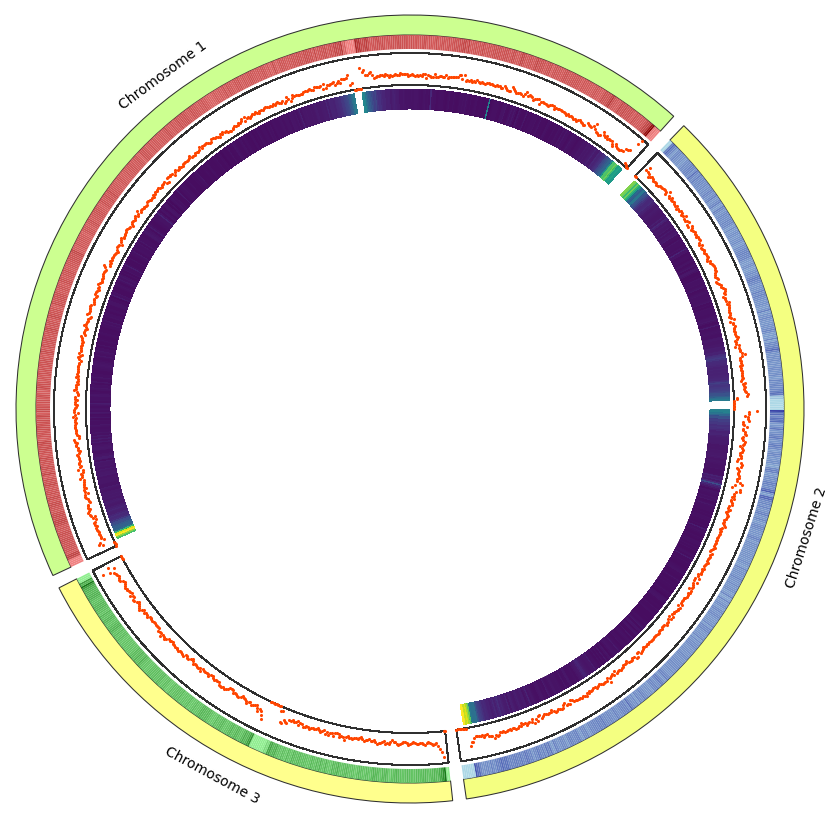

In [ ]:
circle.figure

# **intra-chromosomal bins (from max values I want to work with only top 25% of the intra-chromosomal bins) the values fall in the max 25% intra-chromosomal values,**

In [ ]:
import collections

# Assuming max_intra_chromosomal contains the max interaction values for each bin
# Sort these values and find the top 5% threshold
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)
top_5_percent_threshold = sorted_max_values[int(len(sorted_max_values) * 0.20) - 1]

# Filter interactions for the top 5% intra-chromosomal interactions
top_5_percent_interactions = [(source, target, weight) for source, target, weight in top_25_percent_inter_chromosomal if max_inter_chromosomal[source] >= top_5_percent_threshold and max_inter_chromosomal[target] >= top_5_percent_threshold]

# Create the chord plot for these interactions
for source, target, _ in top_5_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):  # Ensure it's inter-chromosomal
        source_start = source - chromosome_bins[determine_chromosome(source)][0]
        source_end = source_start + 1  # Assuming a width of 1 for each bin
        target_start = target - chromosome_bins[determine_chromosome(target)][0]
        target_end = target_start + 1  # Assuming a width of 1 for each bin

        source_arc = (determine_chromosome(source), source_start, source_end, 770)
        target_arc = (determine_chromosome(target), target_start, target_end, 770)

        circle.chord_plot(source_arc, target_arc, facecolor=circle.garc_dict[determine_chromosome(source)].facecolor)


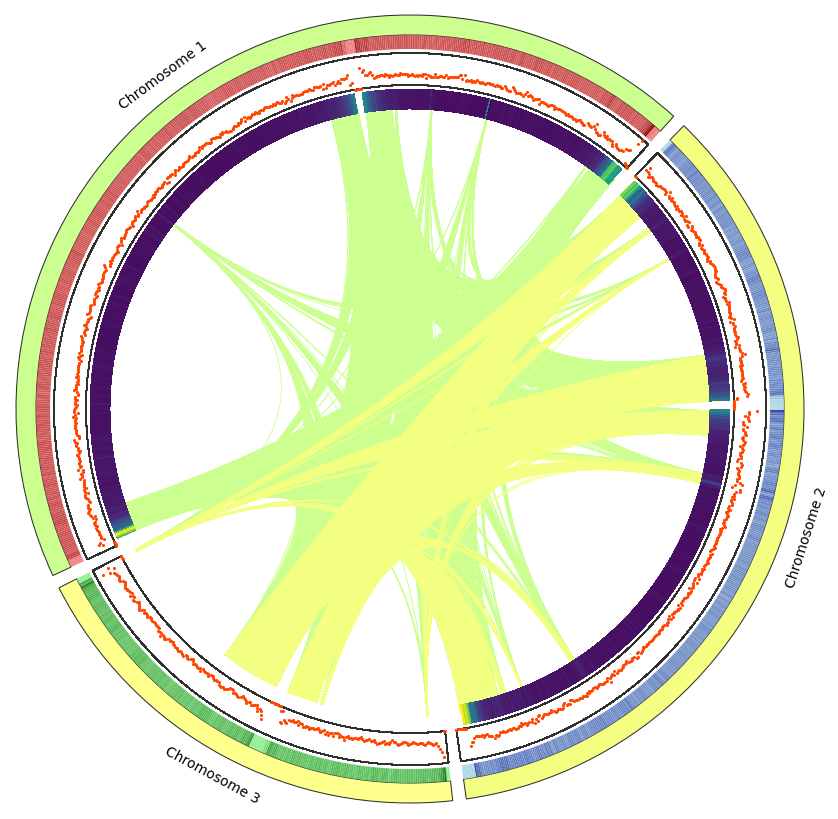

In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/wt999a.pdf")

#**Yeast: Rad 21 Mutant**

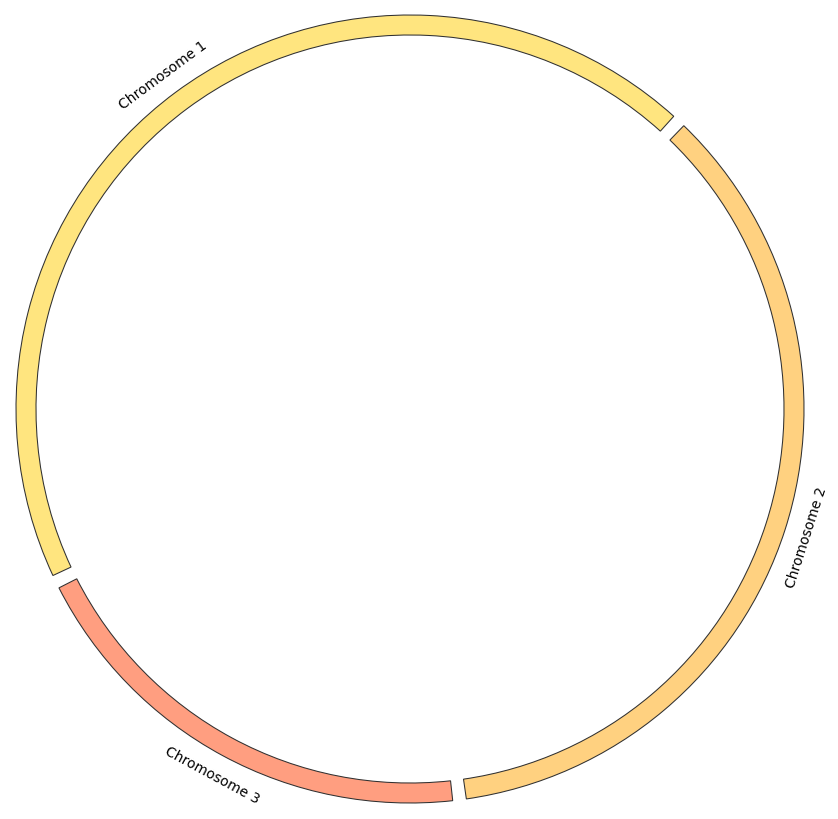

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc

# Define the chromosome bin ranges
chromosome_bins = {
    'Chromosome 1': (1, 558),
    'Chromosome 2': (559, 1012),
    'Chromosome 3': (1013, 1258)
}

# Initialize the Gcircle object for the circos plot
circle = Gcircle(figsize=(8, 8))

# Add Garc objects for each chromosome segment to the circle
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    # Calculate the length of each chromosome segment for the Garc size
    length = end_bin - start_bin + 1
    # Create the Garc object with the specified size and add it to the circle
    arc = Garc(arc_id=chrom, size=length, interspace=2, raxis_range=(935, 985), labelposition=80, label_visible=True)
    circle.add_garc(arc)

# Set the chromosome arcs positions on the circle
circle.set_garcs(-115, 245)

# Read the data, omitting rows with interaction values of 10000
file_path = '/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/GSM1379430_rad21ts-corrected-matrix_hic.csv'
data = []
with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        source, target,interaction_type, weight = line.strip().split(',')
        weight = float(weight)
        if weight != 10000:
            data.append((int(source), int(target), weight))

# (Here you would continue processing the data and adding it to the plot)



In [ ]:
# Initialize a dictionary to store the maximum interaction value for each source bin
max_interaction_values = {bin_id: 0 for bin_id in range(1, 1259)}  # Assuming bin IDs start at 1 and end at 1258

# Process the data to find the maximum interaction value for each source bin
for source, target, weight in data:
    if weight > max_interaction_values[source]:
        max_interaction_values[source] = weight

# Convert the max interaction values to a list if needed, where index corresponds to the bin ID minus one
max_interaction_values_list = [max_interaction_values[bin_id] for bin_id in range(1, 1259)]

# Now max_interaction_values_list contains the highest interaction value for each corresponding source bin
print(max_interaction_values_list)

[0, 0, 0, 0, 0.032001, 0.037782, 0.039976, 0.021119, 0.020678, 0.02564, 0.025917, 0.025027, 0.023017, 0.021417, 0.022293, 0.021054, 0.022882, 0.023886, 0.026673, 0.024275, 0.019931, 0.016798, 0.021267, 0.027361, 0.030507, 0.034945, 0.029907, 0.024913, 0.021072, 0.023819, 0.030369, 0.022042, 0.018946, 0.021623, 0.023723, 0.02774, 0.019548, 0.023424, 0.023845, 0.025972, 0.025129, 0.018161, 0.022817, 0.021582, 0.020229, 0.019917, 0.023858, 0.032871, 0.027695, 0.023473, 0.019954, 0.025687, 0.0283, 0.024415, 0.025984, 0.02539, 0.021265, 0.023517, 0.022196, 0.024195, 0.024941, 0.028116, 0.019871, 0.018955, 0.020534, 0.025267, 0.024536, 0.02841, 0.028482, 0.025816, 0.027919, 0.024316, 0.018666, 0.021372, 0.021158, 0.024113, 0.023086, 0.020424, 0.028955, 0.029031, 0.021623, 0.026061, 0.024479, 0.021901, 0.018442, 0.015276, 0.021249, 0.02776, 0.023461, 0.022734, 0.027641, 0.021439, 0.021699, 0.019905, 0.021599, 0.030087, 0.021828, 0.014676, 0.016428, 0.022837, 0.027653, 0.024911, 0.020832, 0.02

In [ ]:
import matplotlib.colors as mcolors

# Assuming max_interaction_values_list is already computed as before
# Normalize the interaction values to the range [0, 1]
norm = plt.Normalize(min(max_interaction_values_list), max(max_interaction_values_list))

# Create color maps for each chromosome
color_maps = {
    'Chromosome 1': mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"]),
    'Chromosome 2': mcolors.LinearSegmentedColormap.from_list("", ["lightblue", "darkblue"]),
    'Chromosome 3': mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "darkgreen"])
}

# Create a color map from light red to dark red
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])
# Define the radial range for the cytoband, increase the height by adjusting these values
inner_radius = 900  # Decrease this value to make the band taller (move inner circle down)
outer_radius = 935  # Increase this value to make the band taller (move outer circle up)

# Add cytobands to the circos plot
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    cmap = color_maps[chrom]
    for bin_id in range(start_bin, end_bin + 1):
        interaction_value = max_interaction_values[bin_id]
        color = cmap(norm(interaction_value))

        # Calculate the position of the bin within the chromosome arc
        position = bin_id - start_bin

        # Add a barplot for this bin with the color based on the interaction value
        circle.barplot(chrom, data=[1], positions=[position], width=1,
                       raxis_range=(inner_radius, outer_radius), facecolor=color, edgecolor=color)

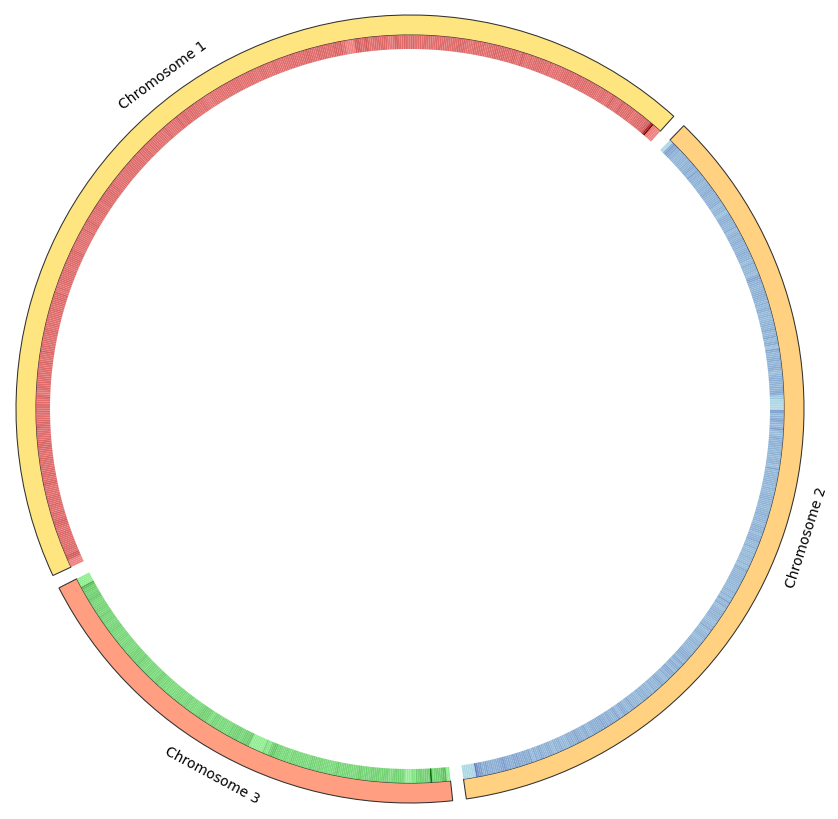

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# We'll use the max_interaction_values you computed earlier
# vmin and vmax are the minimum and maximum values of your interaction values
import pycircos

# Calculate vmin and vmax from max_interaction_values
vmin, vmax = min(max_interaction_values.values()), max(max_interaction_values.values())

# Set the radius range for the scatter plot
scatter_raxis_range = (810, 890)  # Adjust this as necessary to fit your plot

# Add scatter plot to the circos plot for each bin
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    for bin_id in range(start_bin, end_bin + 1):
        if bin_id in max_interaction_values:  # Ensure the bin_id is in your data
            interaction_value = max_interaction_values[bin_id]
            position = bin_id - start_bin
            circle.scatterplot(chrom, data=[interaction_value], positions=[position],
                               rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
                               raxis_range=scatter_raxis_range, facecolor="orangered", spine=True)

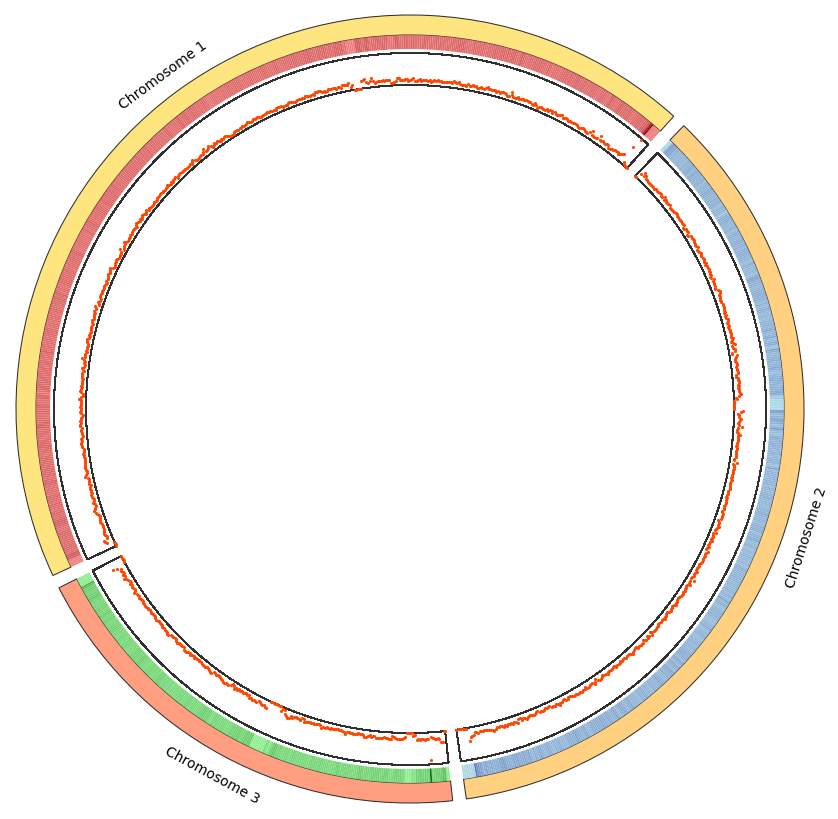

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# Initialize dictionaries to track max and min values for each bin
max_inter_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_inter_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}
max_intra_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_intra_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}

# Function to determine the chromosome of a bin
def determine_chromosome(bin_id):
    for chrom, (start, end) in chromosome_bins.items():
        if start <= bin_id <= end:
            return chrom
    return None

# Classify each interaction and update max/min values
for source, target, weight in data:
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)

    if source_chrom and target_chrom:
        if source_chrom == target_chrom:  # Intra-chromosomal
            max_intra_chromosomal[source] = max(max_intra_chromosomal[source], weight)
            min_intra_chromosomal[source] = min(min_intra_chromosomal[source], weight) if weight > 0 else min_intra_chromosomal[source]
            max_intra_chromosomal[target] = max(max_intra_chromosomal[target], weight)
            min_intra_chromosomal[target] = min(min_intra_chromosomal[target], weight) if weight > 0 else min_intra_chromosomal[target]
        else:  # Inter-chromosomal
            max_inter_chromosomal[source] = max(max_inter_chromosomal[source], weight)
            min_inter_chromosomal[source] = min(min_inter_chromosomal[source], weight) if weight > 0 else min_inter_chromosomal[source]
            max_inter_chromosomal[target] = max(max_inter_chromosomal[target], weight)
            min_inter_chromosomal[target] = min(min_inter_chromosomal[target], weight) if weight > 0 else min_inter_chromosomal[target]

# Filter out bins with no interactions (inf values)
min_inter_chromosomal = {k: v for k, v in min_inter_chromosomal.items() if v != float('inf')}
min_intra_chromosomal = {k: v for k, v in min_intra_chromosomal.items() if v != float('inf')}

# Now you have four datasets:
# max_inter_chromosomal, min_inter_chromosomal, max_intra_chromosomal, min_intra_chromosomal


In [ ]:
# Assuming max_intra_chromosomal is already calculated
# Convert the dictionary values to a sorted list
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)

# Determine the 25% threshold value
top_25_percent_idx = int(len(sorted_max_values) * 0.25) - 1
top_25_percent_threshold = sorted_max_values[top_25_percent_idx]

# Now find the bins that are in the top 25%
top_25_percent_bins = [bin_id for bin_id, value in max_inter_chromosomal.items() if value >= top_25_percent_threshold]

# Fetch the corresponding source and target pairs from the original data
top_25_percent_interactions = [(source, target, weight) for source, target, weight in data if source in top_25_percent_bins or target in top_25_percent_bins]

# Filtering only intra-chromosomal interactions
top_25_percent_inter_chromosomal = []
for source, target, weight in top_25_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):
        top_25_percent_inter_chromosomal.append((source, target, weight))

# Now top_25_percent_intra_chromosomal contains the desired interactions

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc
import collections

# Your existing setup for circos plot
# ...

# Prepare data for the heatmap
# Assuming top_25_percent_intra_chromosomal and max_intra_chromosomal are already defined

# Initialize arcdata_dict to store heatmap data for each chromosome separately
arcdata_dict = collections.defaultdict(lambda: {'positions': [], 'widths': [], 'values': []})

# Populate the arcdata_dict with data for the heatmap
for source, target, weight in top_25_percent_inter_chromosomal:
    max_value = max_inter_chromosomal[source]
    chrom = determine_chromosome(source)
    if chrom:
        position = source - chromosome_bins[chrom][0]  # Adjust position relative to chromosome start
        arcdata_dict[chrom]['positions'].append(position)
        arcdata_dict[chrom]['widths'].append(1)  # Assuming a width of 1 for each bin
        arcdata_dict[chrom]['values'].append(max_value)

# Add heatmaps to the circos plot for each chromosome separately
for chrom, arc_data in arcdata_dict.items():
    vmin, vmax = min(arc_data['values']), max(arc_data['values'])
    circle.heatmap(chrom, data=arc_data['values'], positions=arc_data['positions'],
                   width=arc_data['widths'], raxis_range=[750, 800], vmin=vmin, vmax=vmax,
                   cmap=plt.cm.viridis)

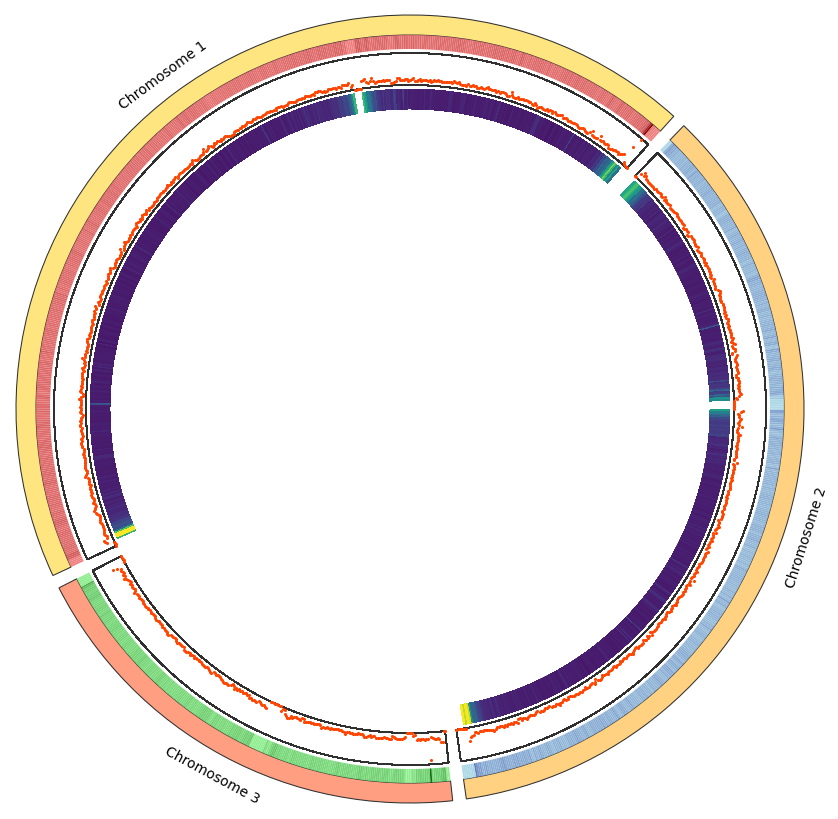

In [ ]:
circle.figure

# **intra-chromosomal bins (from max values I want to work with only top 25% of the intra-chromosomal bins) the values fall in the max 25% intra-chromosomal values,**

In [ ]:
import collections

# Assuming max_intra_chromosomal contains the max interaction values for each bin
# Sort these values and find the top 5% threshold
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)
top_5_percent_threshold = sorted_max_values[int(len(sorted_max_values) * 0.20) - 1]

# Filter interactions for the top 5% intra-chromosomal interactions
top_5_percent_interactions = [(source, target, weight) for source, target, weight in top_25_percent_inter_chromosomal if max_inter_chromosomal[source] >= top_5_percent_threshold and max_inter_chromosomal[target] >= top_5_percent_threshold]

# Create the chord plot for these interactions
for source, target, _ in top_5_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):  # Ensure it's inter-chromosomal
        source_start = source - chromosome_bins[determine_chromosome(source)][0]
        source_end = source_start + 1  # Assuming a width of 1 for each bin
        target_start = target - chromosome_bins[determine_chromosome(target)][0]
        target_end = target_start + 1  # Assuming a width of 1 for each bin

        source_arc = (determine_chromosome(source), source_start, source_end, 770)
        target_arc = (determine_chromosome(target), target_start, target_end, 770)

        circle.chord_plot(source_arc, target_arc, facecolor=circle.garc_dict[determine_chromosome(source)].facecolor)


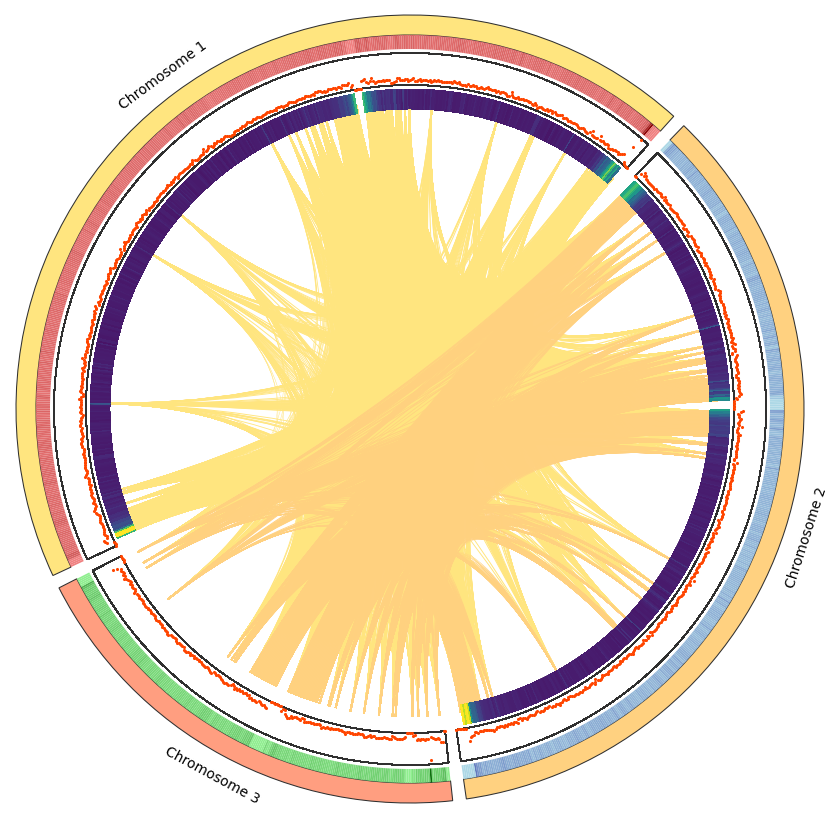

In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/rad21.pdf")

#**Yeast: SPK567**

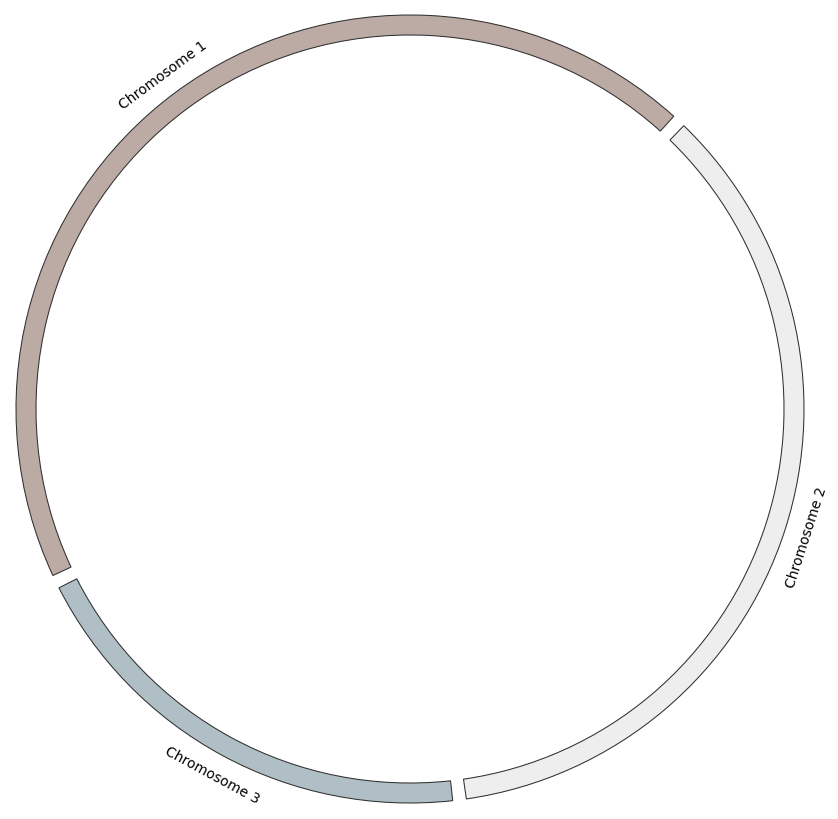

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc

# Define the chromosome bin ranges
chromosome_bins = {
    'Chromosome 1': (1, 558),
    'Chromosome 2': (559, 1012),
    'Chromosome 3': (1013, 1258)
}

# Initialize the Gcircle object for the circos plot
circle = Gcircle(figsize=(8, 8))

# Add Garc objects for each chromosome segment to the circle
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    # Calculate the length of each chromosome segment for the Garc size
    length = end_bin - start_bin + 1
    # Create the Garc object with the specified size and add it to the circle
    arc = Garc(arc_id=chrom, size=length, interspace=2, raxis_range=(935, 985), labelposition=80, label_visible=True)
    circle.add_garc(arc)

# Set the chromosome arcs positions on the circle
circle.set_garcs(-115, 245)

# Read the data, omitting rows with interaction values of 10000
file_path = '/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/GSM1379431_SPK567-corrected-matrix_hic.csv'
data = []
with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        source, target,interaction_type, weight = line.strip().split(',')
        weight = float(weight)
        if weight != 10000:
            data.append((int(source), int(target), weight))

# (Here you would continue processing the data and adding it to the plot)



In [ ]:
# Initialize a dictionary to store the maximum interaction value for each source bin
max_interaction_values = {bin_id: 0 for bin_id in range(1, 1259)}  # Assuming bin IDs start at 1 and end at 1258

# Process the data to find the maximum interaction value for each source bin
for source, target, weight in data:
    if weight > max_interaction_values[source]:
        max_interaction_values[source] = weight

# Convert the max interaction values to a list if needed, where index corresponds to the bin ID minus one
max_interaction_values_list = [max_interaction_values[bin_id] for bin_id in range(1, 1259)]

# Now max_interaction_values_list contains the highest interaction value for each corresponding source bin
print(max_interaction_values_list)

[0, 0, 0, 0, 0.02293, 0.025936, 0.02948, 0.018072, 0.02692, 0.022857, 0.025817, 0.018161, 0.02251, 0.018427, 0.021898, 0.020487, 0.020784, 0.023107, 0.026673, 0.021285, 0.020511, 0.02441, 0.018657, 0.02061, 0.020725, 0.021739, 0.0255, 0.020901, 0.027353, 0.024032, 0.024349, 0.020477, 0.022379, 0.02291, 0.020204, 0.024282, 0.022018, 0.017497, 0.023965, 0.021236, 0.020695, 0.022768, 0.023592, 0.02188, 0.021945, 0.019561, 0.024258, 0.022492, 0.018792, 0.027506, 0.021304, 0.019066, 0.029592, 0.02216, 0.019797, 0.026769, 0.026552, 0.017934, 0.019811, 0.019866, 0.019958, 0.021064, 0.016109, 0.01835, 0.021297, 0.018993, 0.021699, 0.023437, 0.016871, 0.021947, 0.025437, 0.017094, 0.018846, 0.02602, 0.024052, 0.019049, 0.019697, 0.017221, 0.021279, 0.020585, 0.019955, 0.022945, 0.021002, 0.016195, 0.017267, 0.0187, 0.020285, 0.022379, 0.023693, 0.020244, 0.01907, 0.017341, 0.023643, 0.02515, 0.018455, 0.025258, 0.025998, 0.016107, 0.019129, 0.021074, 0.024798, 0.020939, 0.017611, 0.022372, 0.02

In [ ]:
import matplotlib.colors as mcolors

# Assuming max_interaction_values_list is already computed as before
# Normalize the interaction values to the range [0, 1]
norm = plt.Normalize(min(max_interaction_values_list), max(max_interaction_values_list))

# Create color maps for each chromosome
color_maps = {
    'Chromosome 1': mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"]),
    'Chromosome 2': mcolors.LinearSegmentedColormap.from_list("", ["lightblue", "darkblue"]),
    'Chromosome 3': mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "darkgreen"])
}

# Create a color map from light red to dark red
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])
# Define the radial range for the cytoband, increase the height by adjusting these values
inner_radius = 900  # Decrease this value to make the band taller (move inner circle down)
outer_radius = 935  # Increase this value to make the band taller (move outer circle up)

# Add cytobands to the circos plot
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    cmap = color_maps[chrom]
    for bin_id in range(start_bin, end_bin + 1):
        interaction_value = max_interaction_values[bin_id]
        color = cmap(norm(interaction_value))

        # Calculate the position of the bin within the chromosome arc
        position = bin_id - start_bin

        # Add a barplot for this bin with the color based on the interaction value
        circle.barplot(chrom, data=[1], positions=[position], width=1,
                       raxis_range=(inner_radius, outer_radius), facecolor=color, edgecolor=color)

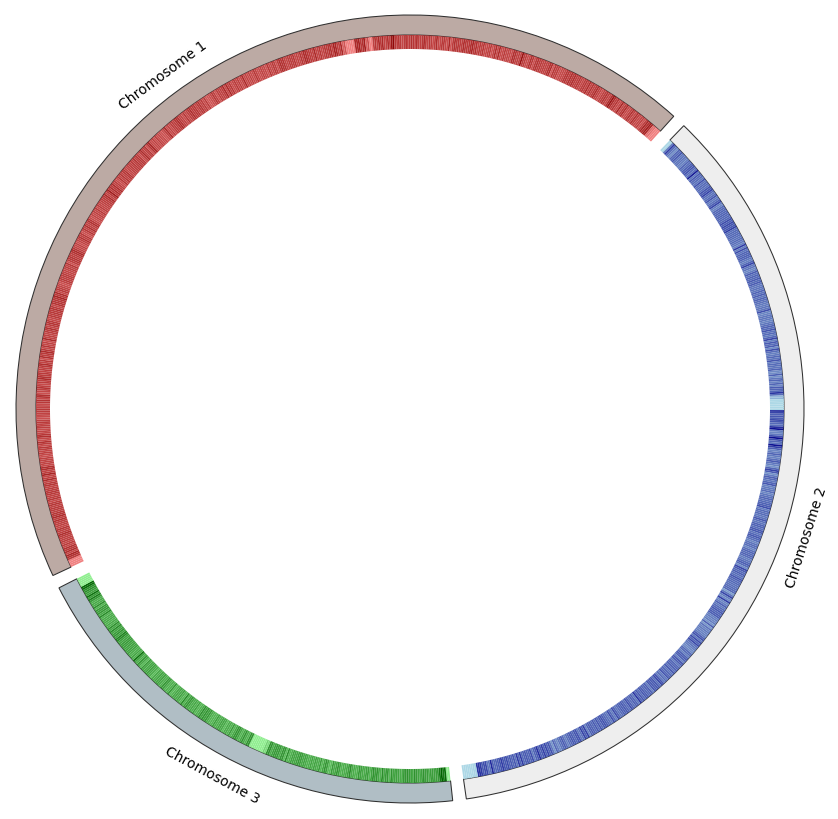

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# We'll use the max_interaction_values you computed earlier
# vmin and vmax are the minimum and maximum values of your interaction values
import pycircos

# Calculate vmin and vmax from max_interaction_values
vmin, vmax = min(max_interaction_values.values()), max(max_interaction_values.values())

# Set the radius range for the scatter plot
scatter_raxis_range = (810, 890)  # Adjust this as necessary to fit your plot

# Add scatter plot to the circos plot for each bin
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    for bin_id in range(start_bin, end_bin + 1):
        if bin_id in max_interaction_values:  # Ensure the bin_id is in your data
            interaction_value = max_interaction_values[bin_id]
            position = bin_id - start_bin
            circle.scatterplot(chrom, data=[interaction_value], positions=[position],
                               rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
                               raxis_range=scatter_raxis_range, facecolor="orangered", spine=True)

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# Initialize dictionaries to track max and min values for each bin
max_inter_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_inter_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}
max_intra_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_intra_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}

# Function to determine the chromosome of a bin
def determine_chromosome(bin_id):
    for chrom, (start, end) in chromosome_bins.items():
        if start <= bin_id <= end:
            return chrom
    return None

# Classify each interaction and update max/min values
for source, target, weight in data:
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)

    if source_chrom and target_chrom:
        if source_chrom == target_chrom:  # Intra-chromosomal
            max_intra_chromosomal[source] = max(max_intra_chromosomal[source], weight)
            min_intra_chromosomal[source] = min(min_intra_chromosomal[source], weight) if weight > 0 else min_intra_chromosomal[source]
            max_intra_chromosomal[target] = max(max_intra_chromosomal[target], weight)
            min_intra_chromosomal[target] = min(min_intra_chromosomal[target], weight) if weight > 0 else min_intra_chromosomal[target]
        else:  # Inter-chromosomal
            max_inter_chromosomal[source] = max(max_inter_chromosomal[source], weight)
            min_inter_chromosomal[source] = min(min_inter_chromosomal[source], weight) if weight > 0 else min_inter_chromosomal[source]
            max_inter_chromosomal[target] = max(max_inter_chromosomal[target], weight)
            min_inter_chromosomal[target] = min(min_inter_chromosomal[target], weight) if weight > 0 else min_inter_chromosomal[target]

# Filter out bins with no interactions (inf values)
min_inter_chromosomal = {k: v for k, v in min_inter_chromosomal.items() if v != float('inf')}
min_intra_chromosomal = {k: v for k, v in min_intra_chromosomal.items() if v != float('inf')}

# Now you have four datasets:
# max_inter_chromosomal, min_inter_chromosomal, max_intra_chromosomal, min_intra_chromosomal


In [ ]:
# Assuming max_intra_chromosomal is already calculated
# Convert the dictionary values to a sorted list
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)

# Determine the 25% threshold value
top_25_percent_idx = int(len(sorted_max_values) * 0.25) - 1
top_25_percent_threshold = sorted_max_values[top_25_percent_idx]

# Now find the bins that are in the top 25%
top_25_percent_bins = [bin_id for bin_id, value in max_inter_chromosomal.items() if value >= top_25_percent_threshold]

# Fetch the corresponding source and target pairs from the original data
top_25_percent_interactions = [(source, target, weight) for source, target, weight in data if source in top_25_percent_bins or target in top_25_percent_bins]

# Filtering only intra-chromosomal interactions
top_25_percent_inter_chromosomal = []
for source, target, weight in top_25_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):
        top_25_percent_inter_chromosomal.append((source, target, weight))

# Now top_25_percent_intra_chromosomal contains the desired interactions

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc
import collections

# Your existing setup for circos plot
# ...

# Prepare data for the heatmap
# Assuming top_25_percent_intra_chromosomal and max_intra_chromosomal are already defined

# Initialize arcdata_dict to store heatmap data for each chromosome separately
arcdata_dict = collections.defaultdict(lambda: {'positions': [], 'widths': [], 'values': []})

# Populate the arcdata_dict with data for the heatmap
for source, target, weight in top_25_percent_inter_chromosomal:
    max_value = max_inter_chromosomal[source]
    chrom = determine_chromosome(source)
    if chrom:
        position = source - chromosome_bins[chrom][0]  # Adjust position relative to chromosome start
        arcdata_dict[chrom]['positions'].append(position)
        arcdata_dict[chrom]['widths'].append(1)  # Assuming a width of 1 for each bin
        arcdata_dict[chrom]['values'].append(max_value)

# Add heatmaps to the circos plot for each chromosome separately
for chrom, arc_data in arcdata_dict.items():
    vmin, vmax = min(arc_data['values']), max(arc_data['values'])
    circle.heatmap(chrom, data=arc_data['values'], positions=arc_data['positions'],
                   width=arc_data['widths'], raxis_range=[750, 800], vmin=vmin, vmax=vmax,
                   cmap=plt.cm.viridis)

In [ ]:
circle.figure

# **intra-chromosomal bins (from max values I want to work with only top 25% of the intra-chromosomal bins) the values fall in the max 25% intra-chromosomal values,**

In [ ]:
import collections

# Assuming max_intra_chromosomal contains the max interaction values for each bin
# Sort these values and find the top 5% threshold
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)
top_5_percent_threshold = sorted_max_values[int(len(sorted_max_values) * 0.20) - 1]

# Filter interactions for the top 5% intra-chromosomal interactions
top_5_percent_interactions = [(source, target, weight) for source, target, weight in top_25_percent_inter_chromosomal if max_inter_chromosomal[source] >= top_5_percent_threshold and max_inter_chromosomal[target] >= top_5_percent_threshold]

# Create the chord plot for these interactions
for source, target, _ in top_5_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):  # Ensure it's inter-chromosomal
        source_start = source - chromosome_bins[determine_chromosome(source)][0]
        source_end = source_start + 1  # Assuming a width of 1 for each bin
        target_start = target - chromosome_bins[determine_chromosome(target)][0]
        target_end = target_start + 1  # Assuming a width of 1 for each bin

        source_arc = (determine_chromosome(source), source_start, source_end, 770)
        target_arc = (determine_chromosome(target), target_start, target_end, 770)

        circle.chord_plot(source_arc, target_arc, facecolor=circle.garc_dict[determine_chromosome(source)].facecolor)


In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/spk567.pdf")

#**Yeast: SPTA333**

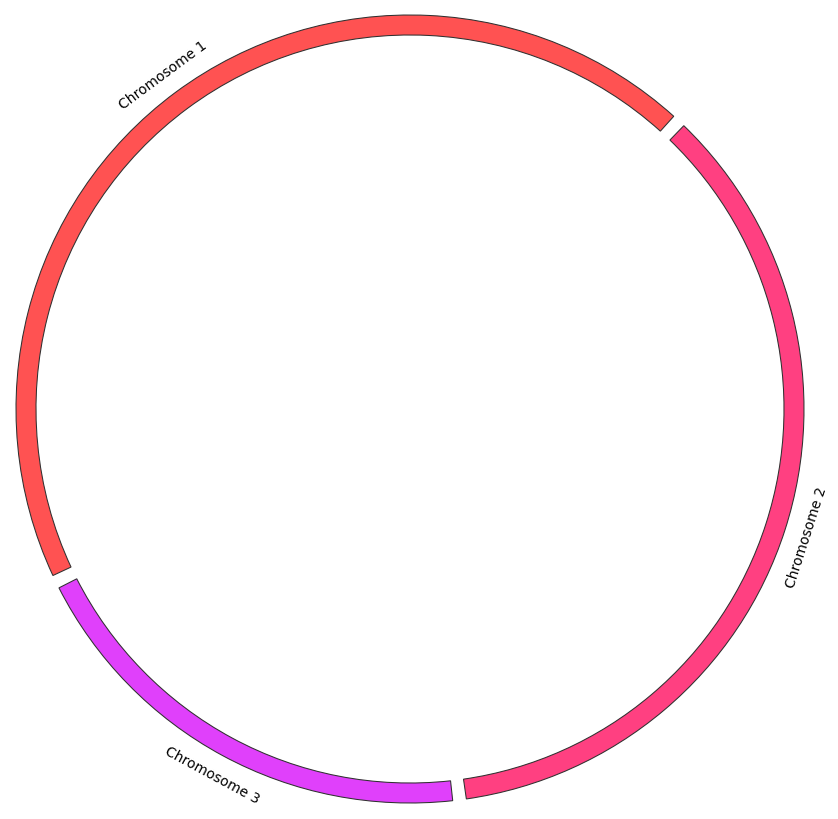

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc

# Define the chromosome bin ranges
chromosome_bins = {
    'Chromosome 1': (1, 558),
    'Chromosome 2': (559, 1012),
    'Chromosome 3': (1013, 1258)
}

# Initialize the Gcircle object for the circos plot
circle = Gcircle(figsize=(8, 8))

# Add Garc objects for each chromosome segment to the circle
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    # Calculate the length of each chromosome segment for the Garc size
    length = end_bin - start_bin + 1
    # Create the Garc object with the specified size and add it to the circle
    arc = Garc(arc_id=chrom, size=length, interspace=2, raxis_range=(935, 985), labelposition=80, label_visible=True)
    circle.add_garc(arc)

# Set the chromosome arcs positions on the circle
circle.set_garcs(-115, 245)

# Read the data, omitting rows with interaction values of 10000
file_path = '/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/GSM1379429_SPTA333-corrected-matrix_hic.csv'
data = []
with open(file_path, 'r') as file:
    next(file)  # Skip the header
    for line in file:
        source, target,interaction_type, weight = line.strip().split(',')
        weight = float(weight)
        if weight != 10000:
            data.append((int(source), int(target), weight))

# (Here you would continue processing the data and adding it to the plot)



In [ ]:
# Initialize a dictionary to store the maximum interaction value for each source bin
max_interaction_values = {bin_id: 0 for bin_id in range(1, 1259)}  # Assuming bin IDs start at 1 and end at 1258

# Process the data to find the maximum interaction value for each source bin
for source, target, weight in data:
    if weight > max_interaction_values[source]:
        max_interaction_values[source] = weight

# Convert the max interaction values to a list if needed, where index corresponds to the bin ID minus one
max_interaction_values_list = [max_interaction_values[bin_id] for bin_id in range(1, 1259)]

# Now max_interaction_values_list contains the highest interaction value for each corresponding source bin
print(max_interaction_values_list)

[0, 0, 0, 0, 0.05131, 0.062425, 0.050128, 0.032018, 0.05042, 0.058864, 0.062297, 0.055186, 0.062382, 0.069444, 0.064354, 0.067971, 0.049284, 0.061339, 0.066501, 0.063835, 0.052975, 0.061933, 0.057712, 0.064529, 0.066112, 0.06608, 0.070206, 0.054658, 0.085631, 0.073448, 0.058466, 0.044458, 0.057434, 0.059199, 0.064739, 0.078336, 0.078152, 0.045244, 0.074991, 0.070665, 0.052109, 0.077078, 0.062762, 0.061507, 0.05504, 0.052717, 0.085934, 0.066201, 0.058165, 0.069805, 0.056747, 0.045485, 0.076165, 0.065782, 0.052353, 0.067495, 0.061194, 0.052264, 0.084551, 0.064823, 0.069199, 0.082753, 0.062814, 0.048103, 0.075908, 0.052892, 0.064599, 0.066803, 0.064549, 0.075399, 0.081886, 0.048702, 0.055217, 0.065248, 0.068068, 0.059633, 0.064862, 0.064565, 0.062803, 0.058943, 0.063111, 0.067425, 0.066726, 0.053913, 0.054704, 0.058572, 0.060741, 0.066934, 0.0649, 0.060806, 0.06095, 0.05451, 0.069527, 0.062096, 0.052712, 0.069406, 0.063566, 0.045008, 0.044948, 0.056484, 0.077701, 0.060396, 0.070361, 0.066

In [ ]:
import matplotlib.colors as mcolors

# Assuming max_interaction_values_list is already computed as before
# Normalize the interaction values to the range [0, 1]
norm = plt.Normalize(min(max_interaction_values_list), max(max_interaction_values_list))

# Create color maps for each chromosome
color_maps = {
    'Chromosome 1': mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"]),
    'Chromosome 2': mcolors.LinearSegmentedColormap.from_list("", ["lightblue", "darkblue"]),
    'Chromosome 3': mcolors.LinearSegmentedColormap.from_list("", ["lightgreen", "darkgreen"])
}

# Create a color map from light red to dark red
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["lightcoral", "darkred"])
# Define the radial range for the cytoband, increase the height by adjusting these values
inner_radius = 900  # Decrease this value to make the band taller (move inner circle down)
outer_radius = 935  # Increase this value to make the band taller (move outer circle up)

# Add cytobands to the circos plot
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    cmap = color_maps[chrom]
    for bin_id in range(start_bin, end_bin + 1):
        interaction_value = max_interaction_values[bin_id]
        color = cmap(norm(interaction_value))

        # Calculate the position of the bin within the chromosome arc
        position = bin_id - start_bin

        # Add a barplot for this bin with the color based on the interaction value
        circle.barplot(chrom, data=[1], positions=[position], width=1,
                       raxis_range=(inner_radius, outer_radius), facecolor=color, edgecolor=color)

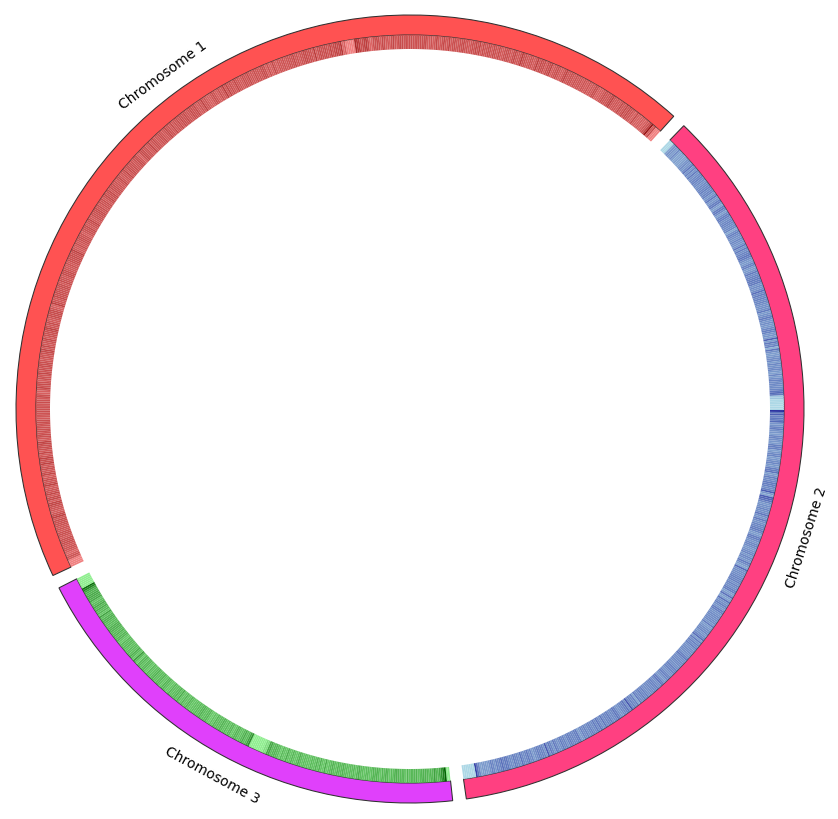

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# We'll use the max_interaction_values you computed earlier
# vmin and vmax are the minimum and maximum values of your interaction values
import pycircos

# Calculate vmin and vmax from max_interaction_values
vmin, vmax = min(max_interaction_values.values()), max(max_interaction_values.values())

# Set the radius range for the scatter plot
scatter_raxis_range = (810, 890)  # Adjust this as necessary to fit your plot

# Add scatter plot to the circos plot for each bin
for chrom, (start_bin, end_bin) in chromosome_bins.items():
    for bin_id in range(start_bin, end_bin + 1):
        if bin_id in max_interaction_values:  # Ensure the bin_id is in your data
            interaction_value = max_interaction_values[bin_id]
            position = bin_id - start_bin
            circle.scatterplot(chrom, data=[interaction_value], positions=[position],
                               rlim=[vmin - 0.05 * abs(vmin), vmax + 0.05 * abs(vmax)],
                               raxis_range=scatter_raxis_range, facecolor="orangered", spine=True)

In [ ]:
# Display the circos plot with the cytoband
circle.figure

In [ ]:
# Initialize dictionaries to track max and min values for each bin
max_inter_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_inter_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}
max_intra_chromosomal = {bin_id: 0 for bin_id in range(1, 1259)}
min_intra_chromosomal = {bin_id: float('inf') for bin_id in range(1, 1259)}

# Function to determine the chromosome of a bin
def determine_chromosome(bin_id):
    for chrom, (start, end) in chromosome_bins.items():
        if start <= bin_id <= end:
            return chrom
    return None

# Classify each interaction and update max/min values
for source, target, weight in data:
    source_chrom = determine_chromosome(source)
    target_chrom = determine_chromosome(target)

    if source_chrom and target_chrom:
        if source_chrom == target_chrom:  # Intra-chromosomal
            max_intra_chromosomal[source] = max(max_intra_chromosomal[source], weight)
            min_intra_chromosomal[source] = min(min_intra_chromosomal[source], weight) if weight > 0 else min_intra_chromosomal[source]
            max_intra_chromosomal[target] = max(max_intra_chromosomal[target], weight)
            min_intra_chromosomal[target] = min(min_intra_chromosomal[target], weight) if weight > 0 else min_intra_chromosomal[target]
        else:  # Inter-chromosomal
            max_inter_chromosomal[source] = max(max_inter_chromosomal[source], weight)
            min_inter_chromosomal[source] = min(min_inter_chromosomal[source], weight) if weight > 0 else min_inter_chromosomal[source]
            max_inter_chromosomal[target] = max(max_inter_chromosomal[target], weight)
            min_inter_chromosomal[target] = min(min_inter_chromosomal[target], weight) if weight > 0 else min_inter_chromosomal[target]

# Filter out bins with no interactions (inf values)
min_inter_chromosomal = {k: v for k, v in min_inter_chromosomal.items() if v != float('inf')}
min_intra_chromosomal = {k: v for k, v in min_intra_chromosomal.items() if v != float('inf')}

# Now you have four datasets:
# max_inter_chromosomal, min_inter_chromosomal, max_intra_chromosomal, min_intra_chromosomal


In [ ]:
# Assuming max_intra_chromosomal is already calculated
# Convert the dictionary values to a sorted list
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)

# Determine the 25% threshold value
top_25_percent_idx = int(len(sorted_max_values) * 0.25) - 1
top_25_percent_threshold = sorted_max_values[top_25_percent_idx]

# Now find the bins that are in the top 25%
top_25_percent_bins = [bin_id for bin_id, value in max_inter_chromosomal.items() if value >= top_25_percent_threshold]

# Fetch the corresponding source and target pairs from the original data
top_25_percent_interactions = [(source, target, weight) for source, target, weight in data if source in top_25_percent_bins or target in top_25_percent_bins]

# Filtering only intra-chromosomal interactions
top_25_percent_inter_chromosomal = []
for source, target, weight in top_25_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):
        top_25_percent_inter_chromosomal.append((source, target, weight))

# Now top_25_percent_intra_chromosomal contains the desired interactions

In [ ]:
import matplotlib.pyplot as plt
from pycircos import Gcircle, Garc
import collections

# Your existing setup for circos plot
# ...

# Prepare data for the heatmap
# Assuming top_25_percent_intra_chromosomal and max_intra_chromosomal are already defined

# Initialize arcdata_dict to store heatmap data for each chromosome separately
arcdata_dict = collections.defaultdict(lambda: {'positions': [], 'widths': [], 'values': []})

# Populate the arcdata_dict with data for the heatmap
for source, target, weight in top_25_percent_inter_chromosomal:
    max_value = max_inter_chromosomal[source]
    chrom = determine_chromosome(source)
    if chrom:
        position = source - chromosome_bins[chrom][0]  # Adjust position relative to chromosome start
        arcdata_dict[chrom]['positions'].append(position)
        arcdata_dict[chrom]['widths'].append(1)  # Assuming a width of 1 for each bin
        arcdata_dict[chrom]['values'].append(max_value)

# Add heatmaps to the circos plot for each chromosome separately
for chrom, arc_data in arcdata_dict.items():
    vmin, vmax = min(arc_data['values']), max(arc_data['values'])
    circle.heatmap(chrom, data=arc_data['values'], positions=arc_data['positions'],
                   width=arc_data['widths'], raxis_range=[750, 800], vmin=vmin, vmax=vmax,
                   cmap=plt.cm.viridis)

In [ ]:
circle.figure

# **intra-chromosomal bins (from max values I want to work with only top 25% of the intra-chromosomal bins) the values fall in the max 25% intra-chromosomal values,**

In [ ]:
import collections

# Assuming max_intra_chromosomal contains the max interaction values for each bin
# Sort these values and find the top 5% threshold
sorted_max_values = sorted(max_inter_chromosomal.values(), reverse=True)
top_5_percent_threshold = sorted_max_values[int(len(sorted_max_values) * 0.20) - 1]

# Filter interactions for the top 5% intra-chromosomal interactions
top_5_percent_interactions = [(source, target, weight) for source, target, weight in top_25_percent_inter_chromosomal if max_inter_chromosomal[source] >= top_5_percent_threshold and max_inter_chromosomal[target] >= top_5_percent_threshold]

# Create the chord plot for these interactions
for source, target, _ in top_5_percent_interactions:
    if determine_chromosome(source) != determine_chromosome(target):  # Ensure it's inter-chromosomal
        source_start = source - chromosome_bins[determine_chromosome(source)][0]
        source_end = source_start + 1  # Assuming a width of 1 for each bin
        target_start = target - chromosome_bins[determine_chromosome(target)][0]
        target_end = target_start + 1  # Assuming a width of 1 for each bin

        source_arc = (determine_chromosome(source), source_start, source_end, 770)
        target_arc = (determine_chromosome(target), target_start, target_end, 770)

        circle.chord_plot(source_arc, target_arc, facecolor=circle.garc_dict[determine_chromosome(source)].facecolor)


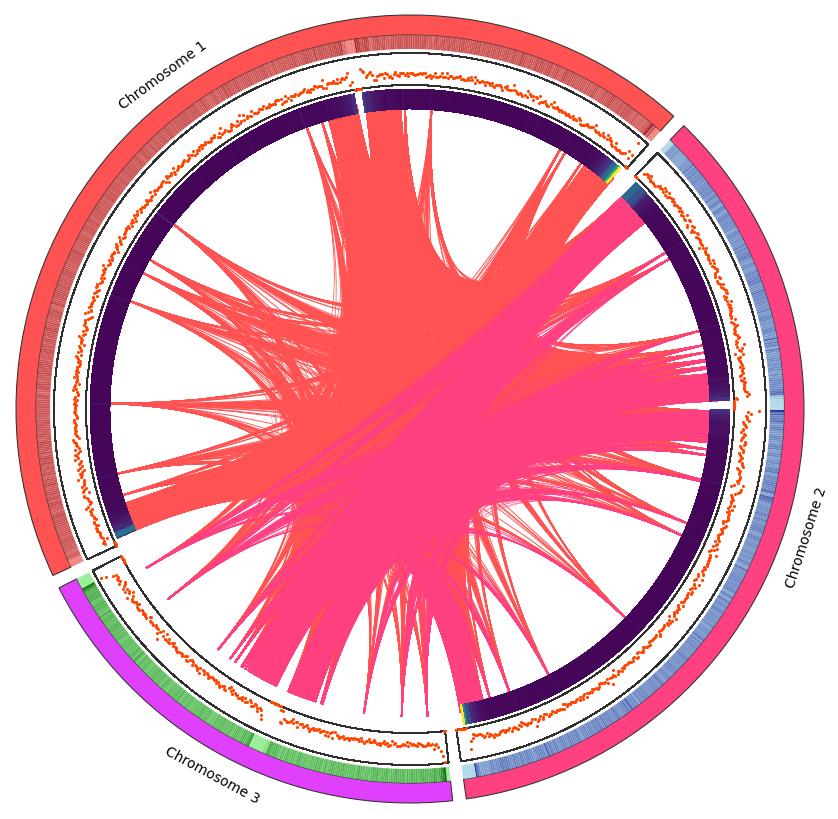

In [ ]:
circle.figure

In [ ]:
circle.figure.savefig("/content/drive/MyDrive/Yeast_Dataset/dataset_yeast_bacteria/spta333.pdf")